In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"22da4992-7ec3-4714-a182-3db31c62ba14\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Draft of Master Excel / Pyquant Reports Project\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

#### [Import all Libraries ](https://colab.research.google.com/drive/1YFQnHV9gr-Hil_G3hGPiB_2H1d-o3AYk?usp=sharing)



[https://colab.research.google.com/drive/1YFQnHV9gr-Hil_G3hGPiB_2H1d-o3AYk?usp=sharing](https://colab.research.google.com/drive/1YFQnHV9gr-Hil_G3hGPiB_2H1d-o3AYk?usp=sharing)



In [ ]:
!pip install -q quantstats --upgrade --no-cache-dir

In [ ]:
!pip install mpl-finance

In [ ]:
!pip install -U git+https://github.com/twopirllc/pandas-ta

  Cloning https://github.com/twopirllc/pandas-ta to /tmp/pip-req-build-e6vm7z8s
  Running command git clone --filter=blob:none --quiet https://github.com/twopirllc/pandas-ta /tmp/pip-req-build-e6vm7z8s
  Resolved https://github.com/twopirllc/pandas-ta to commit 084dbe1c4b76082f383fa3029270ea9ac35e4dc7
  Preparing metadata (setup.py) ... - done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=219751 sha256=158f9dc03e6170ee4ac47c9486eaa03cab0721148221f8d468828d33a3f44e2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ncn14elu/wheels/20/45/7a/52ed064b376efce7aac331bdf6a48e0bb6a22f91ce864810d6
Successfully built pandas-ta


In [ ]:
import quantstats as qs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

url = "https://github.com/alexbernal0/Obsidian/raw/main/ROBOT_ES_LO_30min.xlsx"
sheet_name = "Trades List"

# Strip Whitespace
df.columns = df.columns.str.strip()

df = pd.read_excel(url, sheet_name=sheet_name)
# Drop all columns except '#', 'Date/Time', and 'Profit/Loss '
df = df[["#", "Date/Time", "Profit/Loss "]]

# Shift the contents of the 'Profit/Loss ' column up one row
df["Profit/Loss "] = df["Profit/Loss "].shift(-1)

# Shift the contents of the 'Date/Time' column up one row and duplicate the values in a new column called 'closedDate'
df["closedDate"] = df["Date/Time"].shift(-1)

# Drop the last row since it will be empty after shifting
df = df.drop(df.tail(1).index)

# Drop rows with NaN in '#' column
df = df.dropna(subset=["#"])

# Switch places of 'Profit/Loss ' and 'closedDate' columns
df = df[["#", "closedDate", "Profit/Loss "]]

df["equity"] = 400000 + df["Profit/Loss "].cumsum()

# Convert the 'Profit/Loss ' and 'equity' columns to numeric data type
df["Profit/Loss "] = pd.to_numeric(df["Profit/Loss "], errors="coerce")
df["equity"] = pd.to_numeric(df["equity"], errors="coerce")

# Fill any NaN values in the 'Profit/Loss ' column with 0
df["Profit/Loss "].fillna(0, inplace=True)

# Create a new column called 'returnPerc'
df["returnPerc"] = df["equity"].pct_change()

# Set the first value of 'returnPerc' to 0
df.at[df.index[0], "returnPerc"] = 0.005625

df.head()

,#,closedDate,Profit/Loss,equity,returnPerc
0,1.0,2007-11-21 09:00:00,-3450.0,396550.0,0.005625
2,2.0,2007-11-28 09:30:00,3000.0,399550.0,0.007565
4,3.0,2007-11-29 09:00:00,4300.0,403850.0,0.010762
6,4.0,2007-12-03 09:00:00,-900.0,402950.0,-0.002229
8,5.0,2007-12-07 09:00:00,4550.0,407500.0,0.011292


In [ ]:

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['closedDate', 'returnPerc']]

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['closedDate'])
df.set_index('Date', inplace=True)

df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)
df.head()


,closedDate,returnPerc
Date,,
2007-11-21 09:00:00,2007-11-21 09:00:00,0.005625
2007-11-28 09:30:00,2007-11-28 09:30:00,0.007565
2007-11-29 09:00:00,2007-11-29 09:00:00,0.010762
2007-12-03 09:00:00,2007-12-03 09:00:00,-0.002229
2007-12-07 09:00:00,2007-12-07 09:00:00,0.011292


Performance Metrics

                           Strategy
-------------------------  ----------
Start Period               2007-11-21
End Period                 2023-11-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          108.19%
CAGR﹪                     3.22%

Sharpe                     1.3
Prob. Sharpe Ratio         99.87%
Smart Sharpe               1.12
Sortino                    1.77
Smart Sortino              1.54
Sortino/√2                 1.25
Smart Sortino/√2           1.09
Omega                      1.24

Max Drawdown               -9.81%
Longest DD Days            548
Volatility (ann.)          10.24%
Calmar                     0.33
Skew                       -0.79
Kurtosis                   2.65

Expected Daily %           0.05%
Expected Monthly %         0.38%
Expected Yearly %          4.41%
Kelly Criterion            10.7%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.01%
Expected Shortfall (cVaR)  -1.01%

Max Consecutive Wins       

None

Worst 5 Drawdowns

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-08-03,2022-01-26,2023-02-01,548,-9.808169,-9.585256
2,2008-05-07,2008-10-09,2008-11-21,199,-8.259100,-7.680963
3,2019-03-28,2019-08-14,2019-12-26,274,-6.184707,-5.767557
4,2020-02-21,2020-04-15,2020-06-04,105,-5.771869,-5.698006
5,2007-12-31,2008-01-17,2008-03-19,79,-5.634664,-4.950193


Strategy Visualization

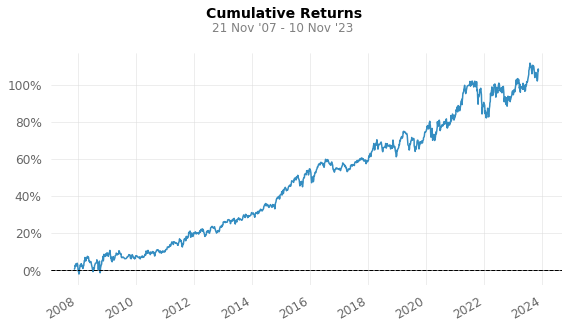

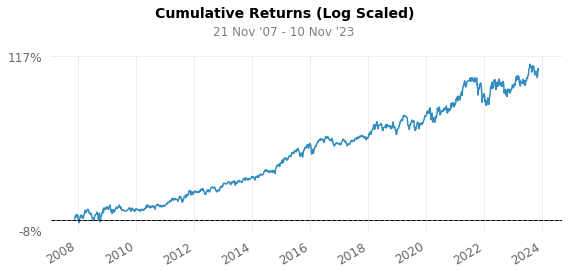

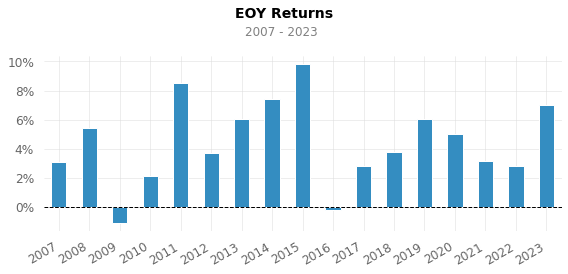

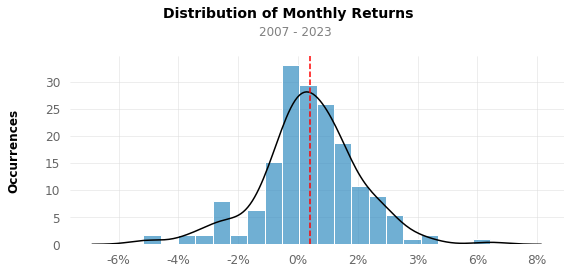

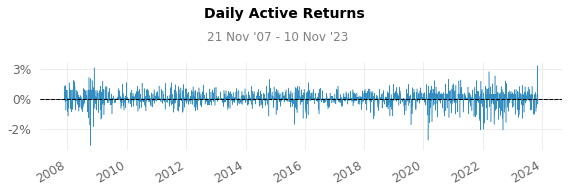

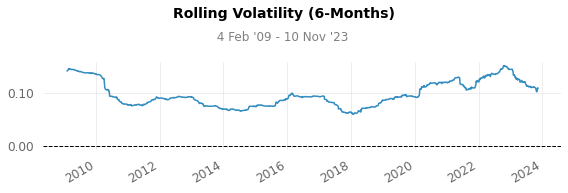

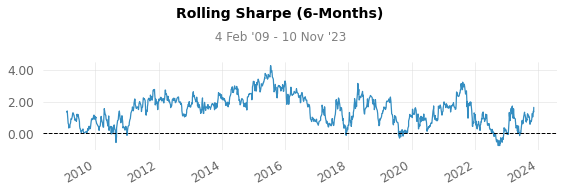

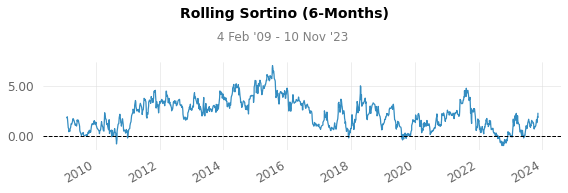

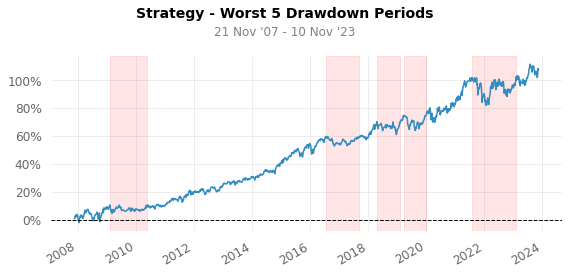

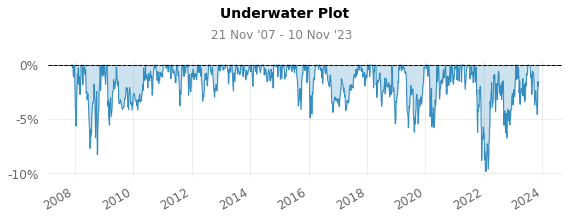

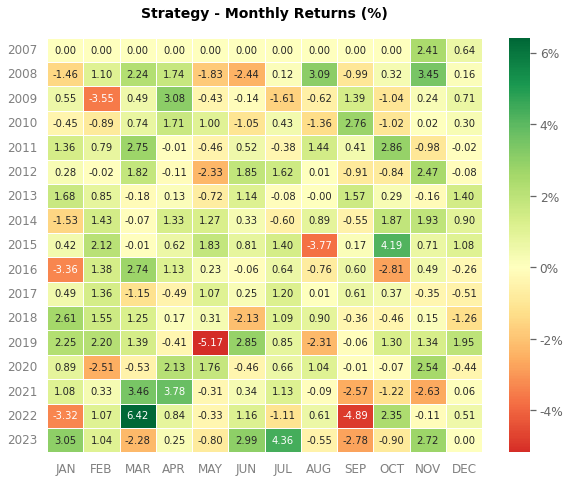

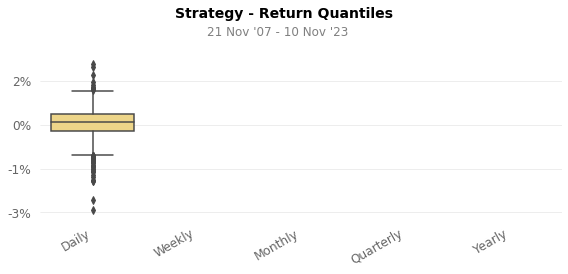

In [ ]:
#Convert dataframe to a series
series = pd.Series(df.returnPerc, index=df.index)
# reset the index to ensure each row has a unique index
df = df.reset_index()

#calc the quantstats report
qs.extend_pandas()
qs.reports.full(series)

In [ ]:
title_name = "ES 30min EM Strategy -Long Only"

#qs.reports.html(series, title=title_name, output="my_report.html")
qs.reports.html(series,title='ES Long Only')